# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 3. Обработка текстов.

### Общая информация

Дата выдачи: 13.01.2022

Мягкий дедлайн: 23:59MSK 6.02.2022

Жесткий дедлайн: 23:59MSK 10.02.2022

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В данном домашнем задании вам предстоит предсказывать пользовательскую оценку отеля по тексту отзыва. Нужно обучиться на данных с кэггла и заслать в [соревнование](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) предикт. По той же ссылке можете скачать данные.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву.

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 0.92 на публичном лидерборде. В противном случае мы будем вынуждены не засчитать задание :( 

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Для локального тестирования используйте предоставленное разбиение на трейн и тест.

Good luck & have fun! 💪

In [2]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

1.10.2+cu102


#### Использовать любые данные для обучения кроме предоставленных организаторами строго запрещено. В последней части можно использовать предобученные модели из библиотеки `transformers`.

In [4]:
PATH_TO_TRAIN_DATA = 'drive/MyDrive/data/train.csv'

In [5]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.sample(10)

,review_id,negative,positive,score
2050,0577cd13e8245a98e0635e0f7f4ff5ee,Had a slight problem with our meal at the in ...,Reception area very beautiful and Made a grea...,9.2
31907,520bcdce8faf17e9544cb337d8051138,Carpeted floor aged bathroom cobwebs at the c...,The location and the breakfast is great espec...,6.3
90725,e82d1266336ae99076f306a6c451d9b6,11 steps down from roadway to reception No as...,Location to shops and to Metro line,7.1
99321,fe3d60970724ac44f25a25373e48d861,overpriced,Good location very close to tram stop direct ...,7.5
31526,512424ee53f417ce5525a31054d0bbbe,It would have been nice to know that in this ...,It was good it was near the central line just...,8.8
35809,5c119f8f25ba0b347b9a944d80317b03,Bad greeting highly overpriced and window bli...,Nothing,4.2
75472,c1632e67adf46ab9c0c84f730cd0b2eb,Poor room for the Hilton,No Positive,7.1
15688,28a9061e07f487c9fafe2823e6b32e83,My booking was described as one for a deluxe ...,No traffic noise but doors banging elsewhere ...,6.3
8858,17173c60b8bd669e729afbcbc7afd84b,Rooms are so small and when we asked the staf...,Location was good,2.9
76494,c3df5c647b22ea84c89dd5cf2be82b77,Finishes not the best,Handy location nice staff innovative room layout,8.8


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [6]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def process_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

from nltk.stem import WordNetLemmatizer 

def process_lower(text):
    return text.lower()
#     return lemmatizer.lemmatize(text.lower())

In [8]:
s = "Now bats are leaving their trees, They're joining the call, Seven Satanic Hell Preachers Heading for the hall. \
Bringing a blood of a newborn child, Got to succeed, if not it's Satan's fall"
lemmatizer = WordNetLemmatizer()
 
stop_words = set(stopwords.words('english') + [ "'s", "'re"]) - {'no'}
# stop_words = set(['a', 'an', 'the', "'s", 'to', "'re", 'is', 'are', 'be', 'been', 'was', 'were', 'has', 'had', 'have'])
def process_text_advanced(text):
    text = [lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) 
            if word not in string.punctuation and word not in stop_words]
    return ' '.join(text)
process_text_advanced(s)

'bat leaving tree joining call seven satanic hell preacher heading hall bringing blood newborn child got succeed satan fall'

In [9]:
df['negative'] = df['negative'].apply(process_text_advanced)
df['positive'] = df['positive'].apply(process_text_advanced)

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1412) # <- для локального тестирования
y_train = df_train['score'].to_numpy()
y_test = df_test['score'].to_numpy()

### Часть 1. 1 балл

Обучите логистическую или линейную регрессию на TF-IDF векторах текстов.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error as MAE

Предскажите этой моделью тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) и сделайте сабмит. Какой у вас получился скор? Прикрепите скриншот из кэггла.

In [12]:
# data_train = (df_train['negative'] + ' ' + df_train['positive']).tolist()
# data_test = (df_test['negative'] + ' ' + df_test['positive']).tolist()
# Вместо этого мне посоветовали делать так:

In [13]:
def pdsp(data):
    return pd.DataFrame.sparse.from_spmatrix(data)

def transform_fragments(v1, v2, data: list, mode=1):
    '''
        mode = 1: fitting + transform, input - train / +test data
        mode = 2: transform, input - only train or test data
    '''
    if mode == 2:
        assert (len(data) == 1)
    
    return_data = []
    for ind, d in enumerate(data):
        if ind > 0 or mode == 2:
            data_pos = v1.transform(d['positive'])
            data_neg = v2.transform(d['negative'])
        else:
            data_pos = v1.fit_transform(d['positive'])
            data_neg = v2.fit_transform(d['negative'])
            
        data_ = pd.concat([pdsp(data_pos), pdsp(data_neg)], axis=1, ignore_index=True)
        return_data += [data_.sparse.to_coo().tocsr()]
    
    return return_data, v1, v2

In [14]:
vec1, vec2 = TfidfVectorizer(), TfidfVectorizer()
X, vec1, vec2 = transform_fragments(vec1, vec2, [df_train, df_test])
X_train, X_test = X[0], X[1]
assert X_train.shape[1] == X_test.shape[1]

In [15]:
# Выдавало ошибку, поэтому перевел в 100-балльную
logreg = LogisticRegression(solver="liblinear").fit(X_train, (y_train * 10).astype(int))
rig = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

In [16]:
y_pred_rig = rig.predict(X_test)
y_pred_lass = lasso.predict(X_test)
y_pred_lr = logreg.predict(X_test)

print('MAE for Ridge:', MAE(y_test, y_pred_rig))
print('MAE for Lasso:', MAE(y_test, y_pred_lass))
print('MAE for LogReg:', MAE(y_test, y_pred_lr / 10))

# MAE for Ridge: 0.8427509194337326
# MAE for Lasso: 1.3166713036799997
# MAE for LogReg: 0.9546279999999999

MAE for Ridge: 0.8427509194337326
MAE for Lasso: 1.3166713036799997
MAE for LogReg: 0.9546279999999999


`Ridge`-регрессия справилась лучше всех.

In [17]:
PATH_TO_TEST_DATA = 'drive/MyDrive/data/test.csv'
for_submit_df = pd.read_csv(PATH_TO_TEST_DATA)
for_submit_df['negative'] = for_submit_df['negative'].apply(process_text_advanced)
for_submit_df['positive'] = for_submit_df['positive'].apply(process_text_advanced)

X_subm, _, _ = transform_fragments(vec1, vec2, [for_submit_df], mode=2)

y_pred_rig_subm = rig.predict(X_subm[0])
for_submit_df.drop(columns=['negative', 'positive'], inplace=True)
for_submit_df['score'] = y_pred_rig_subm

In [18]:
for_submit_df.to_csv('sumbit.csv', index=False)

In [19]:
del X, vec1, vec2, X_train, X_test, y_pred_lr, y_pred_lass, y_pred_rig, X_subm, for_submit_df

### Часть 2. 2 балла

Обучите логистическую или линейную регрессию на усредненных Word2Vec векторах. 

In [20]:
pip install --upgrade gensim

In [21]:
import gensim
from gensim.models import Word2Vec

In [22]:
df_train['negative'] = df_train['negative'].apply(process_text)
df_train['positive'] = df_train['positive'].apply(process_text)
df_test['negative'] = df_test['negative'].apply(process_text)
df_test['positive'] = df_test['positive'].apply(process_text)

In [23]:
w2v_model_pos = Word2Vec(df_train['positive'], window=7, epochs=7)
w2v_model_neg = Word2Vec(df_train['negative'], window=7, epochs=7)

In [24]:
import numpy as np
from scipy.sparse.csr import csr_matrix
# Позаимстовано из https://habr.com/ru/company/ods/blog/329410/
class mean_vectorizer():
    def __init__(self, w2v_model):
        self.w2v_model = w2v_model

    def fit(self, X):
        self.w2v_dict = dict(zip(self.w2v_model.wv.index_to_key, self.w2v_model.wv.vectors))
        self.dim = self.w2v_model.wv.vectors.shape[1]
        return self 

    def transform(self, X):
        return csr_matrix([
            np.mean([self.w2v_dict[w] for w in words if w in self.w2v_dict] 
                or [np.zeros(self.dim)], axis=0) for words in X
        ])
    
    def fit_transform(self, X):
        self = self.fit(X)
        return self.transform(X)

In [25]:
vec1, vec2 = mean_vectorizer(w2v_model_pos), mean_vectorizer(w2v_model_neg)
X, vec1, vec2 = transform_fragments(vec1, vec2, [df_train, df_test])

In [26]:
def get_quality(X_train, y_train, X_test, y_test, alert=False, alpha=1.):
    rig = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred_rig = rig.predict(X_test)
    y_pred_rig_train = rig.predict(X_train)
    q_rig = MAE(y_test, y_pred_rig)
    q_rig_train = MAE(y_train, y_pred_rig_train)
    
    if alert:
        print('Test MAE for Ridge:', q_rig)
        print('Train MAE for Ridge:', q_rig_train)
        
    return q_rig

In [27]:
_ = get_quality(X[0], y_train, X[1], y_test, alert=True)
# Test MAE for Ridge: 0.9604130193301033
# Train MAE for Ridge: 0.9530745706699796

Test MAE for Ridge: 0.9623280538662836
Train MAE for Ridge: 0.9542300129739026


Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [28]:
from collections import defaultdict

class tfidf_vectorizer():
    def __init__(self, w2v_model):
        self.w2v_model = w2v_model
        self.word2weight = None

    def fit(self, X):
        self.w2v_dict = dict(zip(self.w2v_model.wv.index_to_key, self.w2v_model.wv.vectors))
        self.dim = self.w2v_model.wv.vectors.shape[1]
        
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf = tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()]
        )

        return self

    def transform(self, X):
        return csr_matrix([
                np.mean([self.w2v_dict[w] * self.word2weight[w]
                         for w in words if w in self.w2v_dict] or
                        [np.zeros(self.dim)], axis=0) for words in X
            ])

    def fit_transform(self, X):
        self = self.fit(X)
        return self.transform(X)

In [29]:
vec1, vec2 = tfidf_vectorizer(w2v_model_pos), tfidf_vectorizer(w2v_model_neg)
X, vec1, vec2 = transform_fragments(vec1, vec2, [df_train, df_test])

In [30]:
_ = get_quality(X[0], y_train, X[1], y_test, alert=True)
# Test MAE for Ridge: 0.9620847507977837
# Train MAE for Ridge: 0.954713798120569

Test MAE for Ridge: 0.9641755105243773
Train MAE for Ridge: 0.9556134385176874


Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга. 

In [31]:
emb_dims = [i * 50 for i in range(6, 11)]
results = {
    'mean': [],
    'tfidf': []
}

for dim in tqdm(emb_dims):
    
    w2v_model_pos = Word2Vec(df_train['positive'], window=30, vector_size=dim)
    w2v_model_neg = Word2Vec(df_train['negative'], window=30, vector_size=dim)
    
    vec1, vec2 = mean_vectorizer(w2v_model_pos), mean_vectorizer(w2v_model_neg)
    X, _, _ = transform_fragments(vec1, vec2, [df_train, df_test])
    mv_q_rig = get_quality(X[0], y_train, X[1], y_test)
    results['mean'].append(mv_q_rig)
    
    vec1, vec2 = tfidf_vectorizer(w2v_model_pos), tfidf_vectorizer(w2v_model_neg)
    X, _, _ = transform_fragments(vec1, vec2, [df_train, df_test])
    tfidf_q_rig = get_quality(X[0], y_train, X[1], y_test)
    results['tfidf'].append(tfidf_q_rig)

  0%|          | 0/5 [00:00<?, ?it/s]

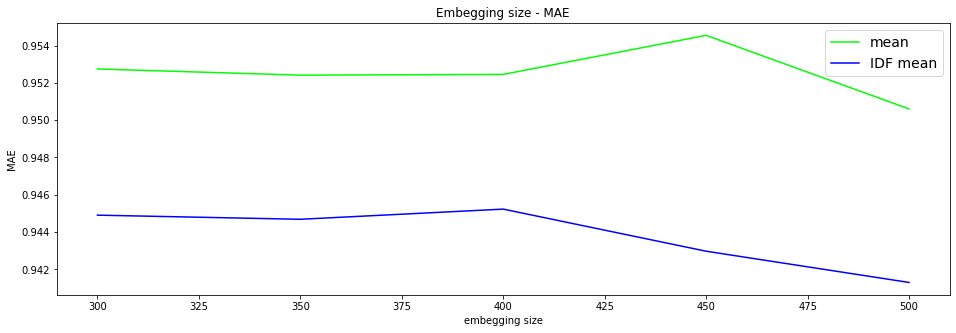

In [32]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
ax1.plot(emb_dims, results['mean'], color='lime', label='mean')
ax1.plot(emb_dims, results['tfidf'], color='blue', label='IDF mean')
ax1.set_xlabel('embegging size')
ax1.set_ylabel('MAE')
ax1.set_title('Embegging size - MAE')
ax1.legend(shadow=False, fontsize=14)
plt.show()

In [33]:
results['tfidf'][np.argmin(results['tfidf'])], emb_dims[np.argmin(results['tfidf'])], \
results['mean'][np.argmin(results['mean'])], emb_dims[np.argmin(results['mean'])]

(0.9412967344933015, 500, 0.9506049075731786, 500)

#### Сделайте выводы:
Я позапускал много раз. Оптимальный размер во многом зависит от гиперпараметров, например, от размера окна `window`. Тенденции тоже могут различаться, но я заметил, что оптимальный размер эмбеддинга обычно свыше 300.

In [34]:
del w2v_model_neg, w2v_model_pos, results

Теперь попробуйте обучить логистическую или линейную регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.

In [35]:
from gensim.models import FastText, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

model_ft_pos = FastText(df_train['positive'], window=10, epochs=12, alpha=0.09, vector_size=300)
model_ft_neg = FastText(df_train['negative'], window=10, epochs=12,  alpha=0.09, vector_size=300)
vec1, vec2 = tfidf_vectorizer(model_ft_pos), tfidf_vectorizer(model_ft_neg)
X, _, _ = transform_fragments(vec1, vec2, [df_train, df_test])
_ = get_quality(X[0], y_train, X[1], y_test, alert=True, alpha=0.2)

# Test MAE for Ridge: 0.9349474496674942
# Train MAE for Ridge: 0.9270191574689883

Test MAE for Ridge: 0.9392109693955217
Train MAE for Ridge: 0.9283219987028422


In [36]:
documents_pos = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_train['positive'])]
documents_neg = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_train['negative'])]
model_d2v_pos = Doc2Vec(documents_pos, window=7, epochs=15, alpha=0.05, vector_size=300)
model_d2v_neg = Doc2Vec(documents_neg, window=7, epochs=10, alpha=0.05, vector_size=300)
del documents_pos, documents_neg

vec1, vec2 = tfidf_vectorizer(model_d2v_pos), tfidf_vectorizer(model_d2v_neg)
X, _, _ = transform_fragments(vec1, vec2, [df_train, df_test])
_ = get_quality(X[0], y_train, X[1], y_test, alert=True)

# Test MAE for Ridge: 0.9338142101887302
# Train MAE for Ridge: 0.9249547038064014

Test MAE for Ridge: 0.9323742092343171
Train MAE for Ridge: 0.9254249373820057


#### Выводы:
Не лучше, чем word2vec + Ridge + IGF-взвешивание. Если сравнивать эти два метода, то из них лучше себя показывает IDF-взвешивание + Ridge + doc2vec.

Предскажите вашей лучшей моделью из этого задания тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) и сделайте сабмит. Какой у вас получился скор? Прикрепите скриншот из кэггла.

In [37]:
submit_df = pd.read_csv(PATH_TO_TEST_DATA)

X_subm, _, _ = transform_fragments(vec1, vec2, [submit_df], mode=2)
rig = Ridge().fit(X[0], y_train)
y_pred_rig_subm = rig.predict(X_subm[0])
submit_df.drop(columns=['negative', 'positive'], inplace=True)
submit_df['score'] = y_pred_rig_subm

submit_df.to_csv('sumbit_2.csv', index=False)

In [38]:
del X_subm, X, vec1, vec2, model_ft_pos, model_ft_neg, model_d2v_pos, model_d2v_neg

### Часть 3. 4 балла

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [1]:
# pip install --upgrade torch

In [2]:
import torch
from IPython.display import clear_output
import pandas as pd
import numpy as np

import torchtext
from torch import nn
from torch.nn import functional as F
print(torch.__version__)

1.10.2+cu102


Вообще говоря можно было бы удалить те отзывы, где в полях пусто, или же с заполнениями а-ля `no positive`/`no negative`. Люди склонны ничего не писать и ставить высокие оценки, либо же писать `no positive` и ставить 0 или, напротив, писать `no negative` и ставить 10. Поэтому я решил ничего не удалять - такие данные могут сильно влиять на результат.

## BERT Fine-Tuning

Я буду решать задачу регрессии, и в таких случаях принято скалировать целевую переменную.

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

PATH_TO_TRAIN_DATA = 'drive/MyDrive/data/train.csv'
PATH_TO_TEST_DATA = 'drive/MyDrive/data/test.csv'

df = pd.read_csv(PATH_TO_TRAIN_DATA)
data = df['positive'] + ' ' + df['negative']
df_train, df_test, y_train, y_test = train_test_split(data, df['score'], random_state=1412)

scaler = StandardScaler().fit(y_train.to_numpy().reshape(-1, 1))
y_train_ = scaler.transform(y_train.to_numpy().reshape(-1, 1))
y_test_ = scaler.transform(y_test.to_numpy().reshape(-1, 1))

### Токенизация и преобразование данных

Прочитав несколько статей, я понял, что нужно использовать встроенные методы эмбеддинга:
- "We can’t use the pre-tokenized version because, in order to apply the pre-trained BERT, we must use the tokenizer provided by the model. This is because (1) the model has a specific, fixed vocabulary and (2) the BERT tokenizer has a particular way of handling out-of-vocabulary words."

- "Common embedding approaches in NLP such as Word2Vec or FastText usually require lemmatization and stop words to be removed, but this is not the case for BERT. The general structure of the text should actually not be modified since BERT relies on it to learn and interpret context."

Как вообще я хотел бы преобразовать данные: отдельно лемматизируем и токенизируем столбцы `positive` и `negative`, получаем тензоры, затем конкатенируем. Можно преобразовывать предварительно сконкатенированные тексты отзывов, а затем токенизировать. В первом случае придется учить две модели и каким-то образом ассемблировать, поэтому я склоняюсь ко второму варианту, хоть и считаю его не совсем правильным.

Привожу выдержки из некоторых прочитанных статей. Здесь описываются специальные токены и в каком виде мы должны подавать данные на вход модели.

We are required to:

* Add special tokens to the start and end of each sentence.
* Pad & truncate all sentences to a single constant length.
* Explicitly differentiate real tokens from padding tokens with the “attention mask”.


[SEP]

At the end of every sentence, we need to append the special [SEP] token.

This token is an artifact of two-sentence tasks, where BERT is given two separate sentences and asked to determine something (e.g., can the answer to the question in sentence A be found in sentence B?).

I am not certain yet why the token is still required when we have only single-sentence input, but it is!

[CLS]

For classification tasks, we must prepend the special [CLS] token to the beginning of every sentence.

This token has special significance. BERT consists of 12 Transformer layers. Each transformer takes in a list of token embeddings, and produces the same number of embeddings on the output (but with the feature values changed, of course!).


\\
BERT takes as input sequences of equal length. Input sequences must thus be padded or truncated at a given length with special characters explicitly indicating the actual start and end of the sequence. The special start character is referred to as the “[CLS]” token.
These input sequences are then split into two :
- A sequence of “input ids”, mapping the words to tokens from the vocabulary the model was pre-trained with,
- A binary sequence of “attention masks” that indicate whether the “input id” at a given index is a word or padding.

In [5]:
# pip install transformers

In [6]:
from transformers import BertTokenizer
from transformers import BertModel, BertConfig
model_name = "bert-base-uncased"

Важно подобрать максимальную длину входной последовательность `max_length`. Максимально допустимо для модели - 512, поэтому посчитаем длины и посмотрим, сколько у нас отзывов, превышающих этот порог.

In [7]:
tkn = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
def define_max_length(dataframe):
    
    tmp_data = np.array(tkn(dataframe.tolist(), return_length=True)['length'])
    # берем 510, так как у нас в запасе два специальных токена - начала и конца последовательности
    inds = np.argwhere(tmp_data > 510)
    count = len(inds)
    max_length = np.max(tmp_data[inds])
    return max_length, count, inds.reshape(-1)

train = define_max_length(df_train)
test = define_max_length(df_test)

Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


In [8]:
print('For train set:\n\tMax Length %.2f\n\tCount: %.2f' % (train[0], train[1]))
print('For test set:\n\tMax Length %.2f\n\tCount: %.2f' % (test[0], test[1]))

For train set:
	Max Length 663.00
	Count: 10.00
For test set:
	Max Length 519.00
	Count: 1.00


Доля таких отзывов относительно числа объектов в датасетах крайне мала, поэтому я предлагаю их выкинуть.

In [9]:
check_ind = train[2][1]
print(y_train_[check_ind-1], y_train_[check_ind], y_train_[check_ind+1], sep="\n")
df_train.iloc[[check_ind-1, check_ind, check_ind+1]]

[0.24375773]
[-0.79355767]
[-0.54948346]


15825     Location spacious rooms  Absolutely boring br...
20862     We drove to the Hotel and paid the extra to p...
66693     Good location   The decor is a little tired t...
dtype: object

In [10]:
df_train.drop(index=df_train.index[train[2]], axis=0, inplace=True)
df_test.drop(index=df_test.index[test[2]], axis=0, inplace=True)

y_train_ = y_train_[np.setdiff1d([i for i in range(len(y_train_))], train[2])]
y_test_ = y_test_[np.setdiff1d([i for i in range(len(y_test_))], test[2])]
df_train.shape, df_test.shape, len(y_train_), len(y_test_)

((74990,), (24999,), 74990, 24999)

In [11]:
check_ind = train[2][1]
print(y_train_[check_ind-2], y_train_[check_ind-1], y_train_[check_ind], sep="\n")
df_train.iloc[[check_ind-2, check_ind-1, check_ind]]

[0.24375773]
[-0.54948346]
[-0.79355767]


15825     Location spacious rooms  Absolutely boring br...
66693     Good location   The decor is a little tired t...
29380                          Clean room  Far from center
dtype: object

Все ОК. Можно токенизировать.

In [12]:
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

# output_attentions=True
train_corpus = tokenizer(text=df_train.tolist(),
                            add_special_tokens=True,
                            padding='max_length',
                            truncation='longest_first', # можно указать truncation=False, но лучше не буду, вдруг бага какая
                            max_length=512,
                            return_attention_mask=True,
                            return_tensors='pt')

test_corpus = tokenizer(text=df_test.tolist(),
                            add_special_tokens=True,
                            padding='max_length',
                            truncation='longest_first',
                            max_length=512,
                            return_attention_mask=True,
                            return_tensors='pt')

input_ids_train = train_corpus['input_ids']
attention_mask_train = train_corpus['attention_mask']

input_ids_test = test_corpus['input_ids']
attention_mask_test = test_corpus['attention_mask']

# sentence split
# tokenizer.tokenize('str')
# sentence mapped to token ids
# tokenizer.convert_tokens_to_ids(tokenizer.tokenize('str))

In [13]:
input_ids_train.shape, attention_mask_train.shape, input_ids_test.shape, attention_mask_test.shape

(torch.Size([74990, 512]),
 torch.Size([74990, 512]),
 torch.Size([24999, 512]),
 torch.Size([24999, 512]))

Как видим, данные были приведены к соответствующему виду - максимальный размер 512, были добавлены соответствующие токены:

In [14]:
input_ids_train[0][:30]

tensor([  101,  2053,  3893,  1996,  2282,  2001,  4714,  1998,  1996,  3976,
         4654, 16368, 16313,  4630,  2005,  2008,  2946,  2282,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [15]:
attention_mask_train[0][:30]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

Индексы `101` и `102` - токены начала `[CLS]` и конца `[SEP]` последовательности. Нули - токены паддинга `[PAD]`. Единицы в маске внимания стоят там, где вообще находится последовательность, т.е. на паддинги она не реагирует. Иными словами маска внимания отличает паддинг от остальных токенов.

### Загрузка данных

In [16]:
from torch.utils.data import TensorDataset, DataLoader

targets_train = torch.tensor(y_train_, dtype=torch.int32)
targets_test = torch.tensor(y_test_, dtype=torch.int32)

train_dataset = TensorDataset(input_ids_train, attention_mask_train, targets_train)
test_dataset = TensorDataset(input_ids_test, attention_mask_test, targets_test)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

### Модель

На выходе последнего (12-го) слоя трансформера в задаче классификации для предсказания используется только первый эмбеддинг `[CLS]`. Выглядит это [так](http://www.mccormickml.com/assets/BERT/padding_and_mask.png). 

- “The first token of every sequence is always a special classification token ([CLS]). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks," - из оригинальной статьи.

Для задачи регрессии мы будем использовать практически то же самое, но мы добавим полносвязный слой.

In [17]:
class BertRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        # pre-trained BERT model
        self.bert = BertModel.from_pretrained(model_name)
        # FC layer for fine-tuning
        self.regressor = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(768, 1)
        )

    def forward(self, input_ids, attention_masks):
        outputs = self.bert(input_ids, attention_masks)
        class_label_output = outputs[1]
        outputs = self.regressor(class_label_output)
        return outputs

In [18]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

def device_memory_info(device):
    if device.type == 'cuda':
        print(torch.cuda.get_device_name(0))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(0) / 1024 ** 3, 1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(0) / 1024 ** 3, 1), 'GB')

device_memory_info(device)

Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [19]:
model = BertRegressor()
model.to(device)
model_device = next(model.parameters()).device
model_device

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


device(type='cuda', index=0)

In [20]:
device_memory_info(model_device)

Tesla K80
Memory Usage:
Allocated: 0.4 GB
Cached:    0.5 GB


### Оптимайзер, функция потерь, планировщик

In [21]:
lr=5e-5
eps=1e-8
epochs=3
total_steps = len(train_loader) * epochs
total_steps

14061

In [22]:
# https://huggingface.co/docs/transformers/v4.16.2/en/main_classes/optimizer_schedules
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(), lr=lr, eps=eps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
criterion = nn.L1Loss(reduction='sum') # MAE

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Возможные гиперпараметры:
- `batch_size`: 16, 32
- `lr`: 5e-5, 3e-5, 2e-5
- `epochs`: 2, 3, 4

### Оптимизации

Очень классной идеей было бы использовать Mixed Precision Training. Мы разбирали этот метод на на НИСе, и он позволяет ускорить обучение. Я наткнулся на библиотеку, которая позволяет это сделать легко и просто: [здесь](https://github.com/nvidia/apex).

Человек, который написал код ниже для установки библиотеки - просто святейший.

In [23]:
# %%writefile setup.sh

# git clone https://github.com/NVIDIA/apex
# cd apex
# pip install -v --no-cache-dir ./

In [24]:
# !sh setup.sh

In [25]:
from apex import amp

In [26]:
opt_level = 'O1'
loss_scale = 128.0
model, optimizer = amp.initialize(model, optimizer, opt_level=opt_level, loss_scale=loss_scale)

Жаль, что в наличие всего одна GPU, так бы можно было заюзать `DistributedDataParallel`.

### Обучение

In [27]:
from torch.nn.utils.clip_grad import clip_grad_norm
from tqdm.notebook import tqdm

def plot_graphs(metrics_dict):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
    ax.plot(metrics_dict['Epoch'], metrics_dict['Train Loss'], 'darkorchid', label='Train', linewidth=2)
    ax.plot(metrics_dict['Epoch'], metrics_dict['Valid Loss'], 'crimson', label='Valid', linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Loss - Epoch')
    ax.legend(shadow=False, fontsize=14)
    plt.show()


def train_loop(model, optimizer, criterion, scheduler, train_loader, valid_loader, device='cpu', epochs=3):
    metrics_dict = { 'Epoch': [i + 1 for i in range(epochs)], 'Train Loss': [], 'Valid Loss': [] }

    for epoch in tqdm(range(epochs)):

        model.train()
        train_loss = 0.0
        for batch in train_loader:
            ids, masks, targets = tuple(t.to(device) for t in batch)
            model.zero_grad()

            outputs = model(ids, masks)           
            loss = criterion(outputs.squeeze(), targets.squeeze())

            loss.backward()
            # with amp.scale_loss(loss, optimizer) as scaled_loss:
            #     scaled_loss.backward()

            clip_grad_norm(model.parameters(), max_norm=2)            
            optimizer.step()
            scheduler.step()
            train_loss += loss.item() * len(targets)
                
        train_loss /= len(train_loader.dataset)
        metrics_dict['Train Loss'].append(train_loss)
        
        
        # model.eval()
        # valid_loss = 0.0
        # for batch_v in valid_loader:
        #     ids_v, masks_v, target_v = tuple(t.to(device) for t in batch_v)

        #     with torch.no_grad():
        #         outputs_v = model(ids_v['input_ids'], ids_v['attention_mask'])           
        #         loss = criterion(outputs_v.squeeze(), target_v.squeeze())
        #     valid_loss += loss.item() * len(target_v)
                
        # valid_loss /= len(valid_loader.dataset)
        # metrics_dict['Valid Loss'].append(valid_loss)
    
        clear_output(wait=True)
        display(pd.DataFrame(metrics_dict))
        
    plot_graphs(metrics_dict)

In [28]:
torch.cuda.empty_cache()
device_memory_info(device)
# train_loop(model, optimizer, criterion, scheduler, train_loader, test_loader, device=model_device, epochs=1)
train(model, optimizer, scheduler, criterion, 1, train_loader, model_device)

Tesla K80
Memory Usage:
Allocated: 0.4 GB
Cached:    0.5 GB
0
-----
0


RuntimeError: ignored

In [ ]:
model.train()
train_loss = 0.0
for batch in train_loader:
    print(0)
    print('------------------------------------------------------------------------------------')
    ids, masks, targets = tuple(t.to(device) for t in batch)
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(1)
    print('------------------------------------------------------------------------------------')
    model.zero_grad()
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(2)
    print('------------------------------------------------------------------------------------')
    outputs = model(ids, masks)
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(3)
    print('------------------------------------------------------------------------------------')        
    loss = criterion(outputs.squeeze(), targets.squeeze())
    # del outputs
    # torch.cuda.empty_cache()
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(4)
    print('------------------------------------------------------------------------------------')
    loss.backward()
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(5)
    print('------------------------------------------------------------------------------------')
    clip_grad_norm(model.parameters(), max_norm=2)
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(6)
    print('------------------------------------------------------------------------------------')
    optimizer.step()
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(7)
    print('------------------------------------------------------------------------------------')
    scheduler.step()
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    print(8)
    print('------------------------------------------------------------------------------------')
    train_loss += loss.item() * len(targets)
    device_memory_info(device)
    print('------------------------------------------------------------------------------------')
    break

In [ ]:

device_memory_info(device)

### Предсказания

In [ ]:
def predict(model, dataloader, device):
    model.eval()
    output = []
    for batch in dataloader:
        batch_inputs, batch_masks = tuple(b.to(device) for b in batch)
        with torch.no_grad():
            output += model(batch_inputs, batch_masks).view(1,-1).tolist()[0]
    return output

In [ ]:
submit_df = pd.read_csv(PATH_TO_TEST_DATA)
submit_data = submit_df['positive'] + ' ' + submit_df['negative']

submit_corpus = tokenizer(text=df_test.tolist(),
                            add_special_tokens=True,
                            padding='max_length',
                            truncation='longest_first',
                            max_length=512,
                            return_attention_mask=True,
                            return_tensors='pt')

input_ids_submit = submit_corpus['input_ids']
attention_mask_submit = submit_corpus['attention_mask']
input_ids_submit.shape, attention_mask_submit.shape

In [ ]:
submit_dataset = TensorDataset(input_ids_submit, attention_mask_submit)
submit_loader = DataLoader(submit_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

y_pred_scaled = predict(model, submit_loader, device)
y_pred = scaler.inverse_transform(y_pred_scaled)

submit_df.drop(columns=['negative', 'positive'], inplace=True)
submit_df['score'] = y_pred
submit_df.to_csv('transformer_sumbit.csv', index=False)

### Контест (до 3 баллов)

По итогам всех ваших экспериментов выберите модель, которую считаете лучшей. Сделайте сабмит в контест. В зависимости от вашего скора на публичном лидерборде, мы начислим вам баллы:

 - <0.76 - 3 балла
 - [0.76; 0.78) - 2 балла
 - [0.78; 0.8) - 1 балл